# Arbre de Décision - Prédiction de Vêtements selon la Météo

Ce notebook implémente un modèle d'arbre de décision pour prédire le type de vêtement à porter en fonction des conditions météorologiques.

## 1. Importation des bibliothèques

In [110]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

## 2. Création du jeu de données météorologiques

Création d'un dataset avec des variables météorologiques :
- **Température** (°C) : température extérieure
- **Humidité** (%) : taux d'humidité
- **Vitesse du vent** (km/h) : force du vent
- **Précipitations** (mm) : quantité de pluie
- **Ensoleillement** (heures) : durée d'ensoleillement

Variable cible : **Type de vêtement** (Léger, Moyen, Chaud)

In [111]:
# Génération de données météorologiques synthétiques
n_samples = 500

# Génération des variables explicatives
data = {
    'temperature': np.random.uniform(-5, 35, n_samples),
    'humidite': np.random.uniform(20, 95, n_samples),
    'vitesse_vent': np.random.uniform(0, 40, n_samples),
    'precipitations': np.random.uniform(0, 30, n_samples),
    'ensoleillement': np.random.uniform(0, 12, n_samples)
}

df = pd.DataFrame(data)

# Création de la variable cible selon des règles logiques
def determine_cloth(row):
    temp = row['temperature']
    pluie = row['precipitations']
    vent = row['vitesse_vent']
    
    # Vêtement chaud : température basse, vent fort ou pluie
    if temp < 10 or (temp < 15 and (pluie > 10 or vent > 25)):
        return 'Chaud'
    # Vêtement léger : température élevée, peu de vent et pas de pluie (conditions assouplies)
    elif temp > 22 and pluie < 8 and vent < 20:
        return 'Léger'
    # Vêtement moyen : cas intermédiaires
    else:
        return 'Moyen'

df['vetement'] = df.apply(determine_cloth, axis=1)

# Affichage des premières lignes
print("Aperçu du jeu de données :")
print(df.head(10))
print(f"\nDimensions du dataset : {df.shape}")
print(f"\nDistribution des classes :")
print(df['vetement'].value_counts())
print(f"\nProportions :")
print(df['vetement'].value_counts(normalize=True))

Aperçu du jeu de données :
   temperature   humidite  vitesse_vent  precipitations  ensoleillement  \
0     9.981605  72.362129      7.405317       15.572454        3.140468   
1    33.028572  60.207227     21.676038       14.375456        2.963746   
2    24.279758  43.214571     34.917833        0.769262       10.875055   
3    18.946339  81.034626     29.288995       10.237435        2.994554   
4     1.240746  71.354838     32.262446       11.405869        3.263397   
5     1.239781  32.196270     26.351335       11.964683        9.112779   
6    -2.676656  88.319539     27.691063       17.405171        5.396878   
7    29.647046  81.690293     33.967826       16.008076        9.320527   
8    19.044600  91.234993      9.986720       18.237153        0.784394   
9    23.322903  74.428963     19.576999       22.946498        5.850854   

  vetement  
0    Chaud  
1    Moyen  
2    Moyen  
3    Moyen  
4    Chaud  
5    Chaud  
6    Chaud  
7    Moyen  
8    Moyen  
9    Moyen  

Dim

## 3. Séparation des variables explicatives (X) et cible (Y)

In [112]:
# Variables explicatives (features)
X = df.drop('vetement', axis=1)

# Variable cible (target)
y = df['vetement']

print("Variables explicatives (X) :")
print(X.head())
print(f"\nShape de X : {X.shape}")
print(f"\nVariable cible (y) :")
print(y.head())
print(f"\nShape de y : {y.shape}")

Variables explicatives (X) :
   temperature   humidite  vitesse_vent  precipitations  ensoleillement
0     9.981605  72.362129      7.405317       15.572454        3.140468
1    33.028572  60.207227     21.676038       14.375456        2.963746
2    24.279758  43.214571     34.917833        0.769262       10.875055
3    18.946339  81.034626     29.288995       10.237435        2.994554
4     1.240746  71.354838     32.262446       11.405869        3.263397

Shape de X : (500, 5)

Variable cible (y) :
0    Chaud
1    Moyen
2    Moyen
3    Moyen
4    Chaud
Name: vetement, dtype: object

Shape de y : (500,)


## 4. Division du dataset (70% entraînement / 30% test)

Utilisation de `stratify` pour conserver la proportion des classes dans les deux ensembles.

In [113]:
# Division stratifiée du dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Taille du jeu d'entraînement : {len(X_train)} échantillons ({len(X_train)/len(X)*100:.1f}%)")
print(f"Taille du jeu de test : {len(X_test)} échantillons ({len(X_test)/len(X)*100:.1f}%)")

print("\nDistribution des classes dans le jeu d'entraînement :")
print(y_train.value_counts())
print(f"\nProportions entraînement :")
print(y_train.value_counts(normalize=True))

print("\nDistribution des classes dans le jeu de test :")
print(y_test.value_counts())
print(f"\nProportions test :")
print(y_test.value_counts(normalize=True))

Taille du jeu d'entraînement : 350 échantillons (70.0%)
Taille du jeu de test : 150 échantillons (30.0%)

Distribution des classes dans le jeu d'entraînement :
vetement
Moyen    169
Chaud    164
Léger     17
Name: count, dtype: int64

Proportions entraînement :
vetement
Moyen    0.482857
Chaud    0.468571
Léger    0.048571
Name: proportion, dtype: float64

Distribution des classes dans le jeu de test :
vetement
Moyen    73
Chaud    70
Léger     7
Name: count, dtype: int64

Proportions test :
vetement
Moyen    0.486667
Chaud    0.466667
Léger    0.046667
Name: proportion, dtype: float64


## 5. Entraînement de l'arbre de décision

In [114]:
# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(
    max_depth=5,           # Limiter la profondeur pour éviter le surapprentissage
    min_samples_split=10,  # Nombre minimum d'échantillons pour diviser un nœud
    min_samples_leaf=5,    # Nombre minimum d'échantillons dans une feuille
    random_state=42
)

# Entraînement
model.fit(X_train, y_train)

print("✓ Modèle entraîné avec succès !")
print(f"\nProfondeur de l'arbre : {model.get_depth()}")
print(f"Nombre de feuilles : {model.get_n_leaves()}")
print(f"Nombre de caractéristiques utilisées : {model.n_features_in_}")

✓ Modèle entraîné avec succès !

Profondeur de l'arbre : 4
Nombre de feuilles : 7
Nombre de caractéristiques utilisées : 5


## 6. Évaluation des performances du modèle

In [115]:
# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul de l'accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("=" * 60)
print("PERFORMANCES DU MODÈLE")
print("=" * 60)
print(f"\nAccuracy sur le jeu d'entraînement : {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
print(f"Accuracy sur le jeu de test : {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print("\n" + "=" * 60)
print("\nRAPPORT DE CLASSIFICATION (Jeu de test) :")
print("=" * 60)
print(classification_report(y_test, y_test_pred))

PERFORMANCES DU MODÈLE

Accuracy sur le jeu d'entraînement : 0.9943 (99.43%)
Accuracy sur le jeu de test : 0.9933 (99.33%)


RAPPORT DE CLASSIFICATION (Jeu de test) :
              precision    recall  f1-score   support

       Chaud       0.99      1.00      0.99        70
       Léger       1.00      1.00      1.00         7
       Moyen       1.00      0.99      0.99        73

    accuracy                           0.99       150
   macro avg       1.00      1.00      1.00       150
weighted avg       0.99      0.99      0.99       150



## 7. Test sur des exemples de journées fictives

In [116]:
# Création d'exemples de journées fictives
journees_fictives = pd.DataFrame({
    'temperature': [28, 5, 18, -2, 32, 12, 15, 22],
    'humidite': [45, 80, 60, 70, 30, 85, 55, 40],
    'vitesse_vent': [8, 30, 15, 25, 5, 20, 18, 10],
    'precipitations': [0, 15, 5, 8, 0, 20, 2, 0],
    'ensoleillement': [10, 2, 6, 1, 12, 3, 5, 9]
})

# Descriptions des journées
descriptions = [
    "Journée chaude et ensoleillée d'été",
    "Journée froide et venteuse d'hiver",
    "Journée printanière agréable",
    "Journée glaciale avec neige",
    "Canicule estivale",
    "Journée pluvieuse et fraîche",
    "Journée d'automne mitigée",
    "Belle journée tempérée"
]

# Prédictions
predictions = model.predict(journees_fictives)

# Affichage des résultats
print("=" * 80)
print("PRÉDICTIONS SUR DES JOURNÉES FICTIVES")
print("=" * 80)
print()

for i, (desc, pred) in enumerate(zip(descriptions, predictions), 1):
    print(f"Journée {i} : {desc}")
    print(f"  • Température : {journees_fictives.iloc[i-1]['temperature']:.1f}°C")
    print(f"  • Humidité : {journees_fictives.iloc[i-1]['humidite']:.1f}%")
    print(f"  • Vitesse du vent : {journees_fictives.iloc[i-1]['vitesse_vent']:.1f} km/h")
    print(f"  • Précipitations : {journees_fictives.iloc[i-1]['precipitations']:.1f} mm")
    print(f"  • Ensoleillement : {journees_fictives.iloc[i-1]['ensoleillement']:.1f} heures")
    print(f"  ➜ VÊTEMENT RECOMMANDÉ : {pred}")
    print("-" * 80)
    print()

PRÉDICTIONS SUR DES JOURNÉES FICTIVES

Journée 1 : Journée chaude et ensoleillée d'été
  • Température : 28.0°C
  • Humidité : 45.0%
  • Vitesse du vent : 8.0 km/h
  • Précipitations : 0.0 mm
  • Ensoleillement : 10.0 heures
  ➜ VÊTEMENT RECOMMANDÉ : Léger
--------------------------------------------------------------------------------

Journée 2 : Journée froide et venteuse d'hiver
  • Température : 5.0°C
  • Humidité : 80.0%
  • Vitesse du vent : 30.0 km/h
  • Précipitations : 15.0 mm
  • Ensoleillement : 2.0 heures
  ➜ VÊTEMENT RECOMMANDÉ : Chaud
--------------------------------------------------------------------------------

Journée 3 : Journée printanière agréable
  • Température : 18.0°C
  • Humidité : 60.0%
  • Vitesse du vent : 15.0 km/h
  • Précipitations : 5.0 mm
  • Ensoleillement : 6.0 heures
  ➜ VÊTEMENT RECOMMANDÉ : Moyen
--------------------------------------------------------------------------------

Journée 4 : Journée glaciale avec neige
  • Température : -2.0°C
  • 

## 8. Visualisation de l'arbre de décision

Visualisation graphique de la structure de l'arbre pour comprendre les règles de décision apprises.

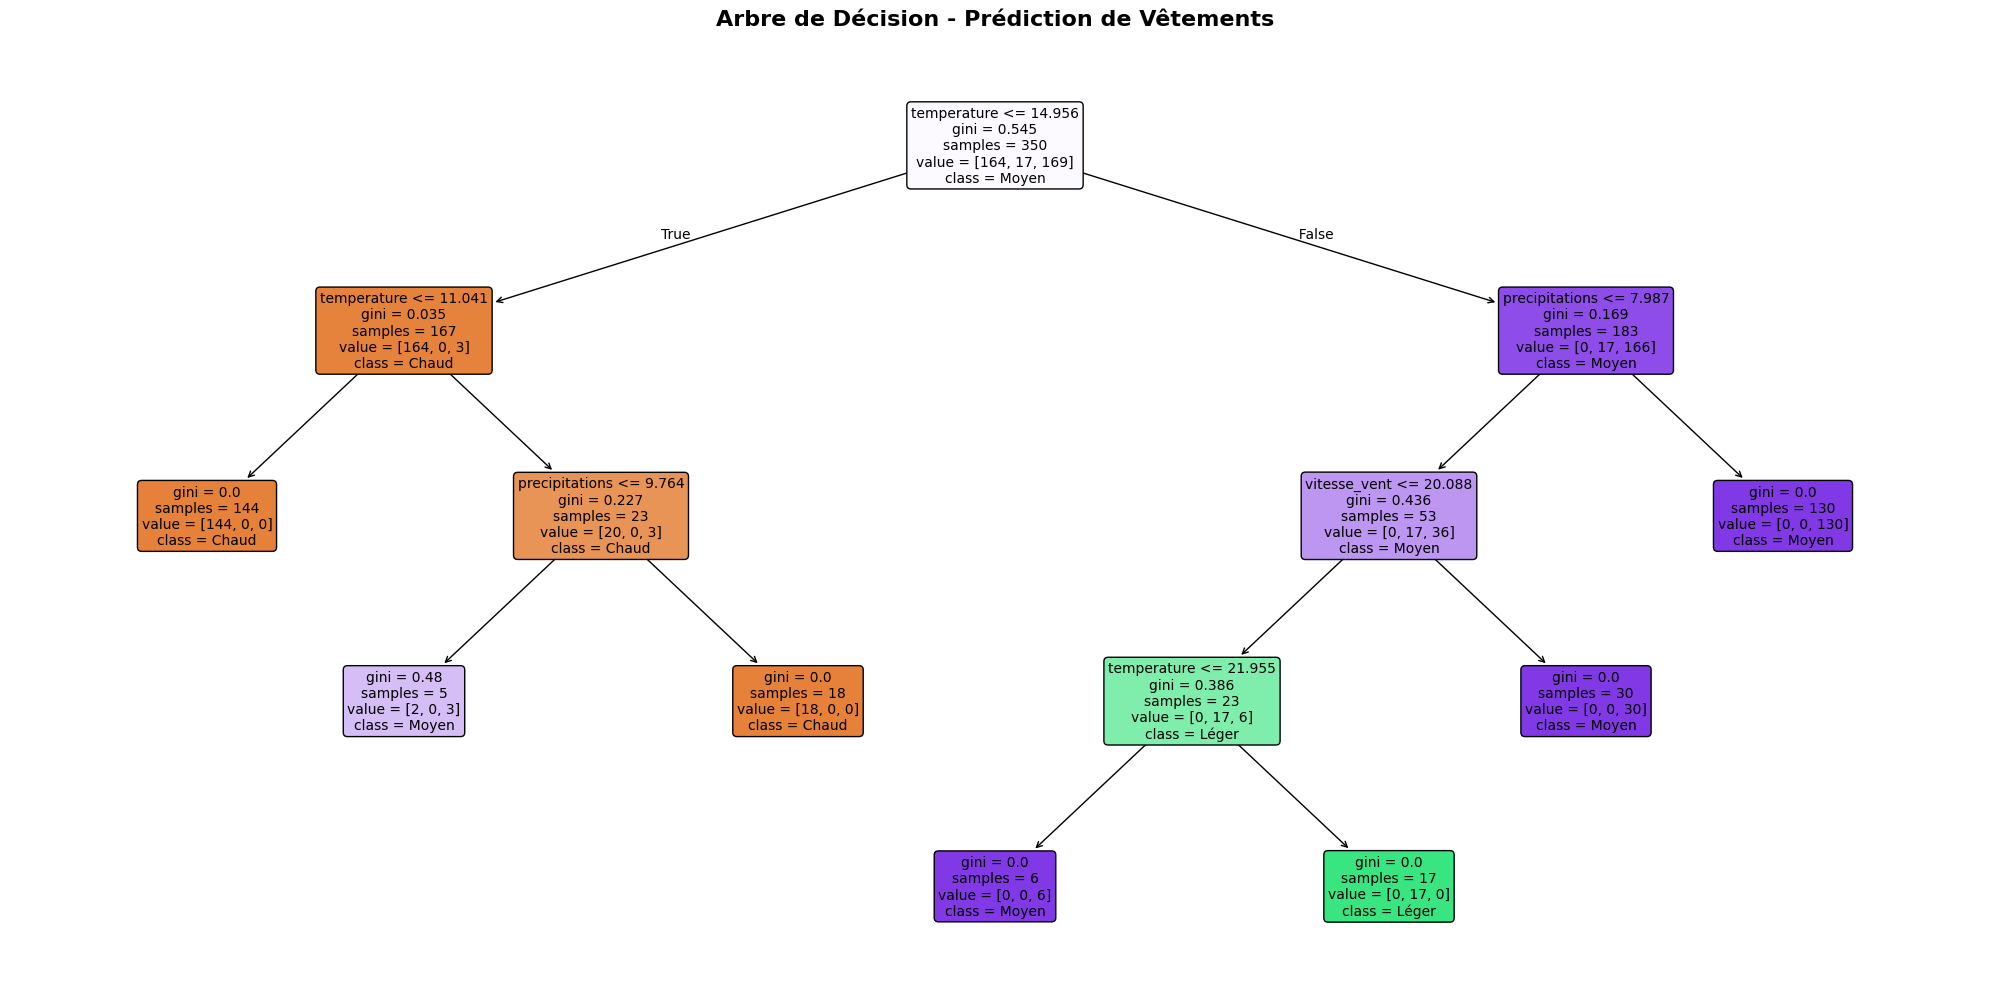

In [117]:
# Visualisation de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Arbre de Décision - Prédiction de Vêtements", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 9. Analyse de l'importance des caractéristiques

IMPORTANCE DES CARACTÉRISTIQUES :
temperature          : 0.8684 (86.84%)
vitesse_vent         : 0.0755 (7.55%)
precipitations       : 0.0561 (5.61%)
humidite             : 0.0000 (0.00%)
ensoleillement       : 0.0000 (0.00%)


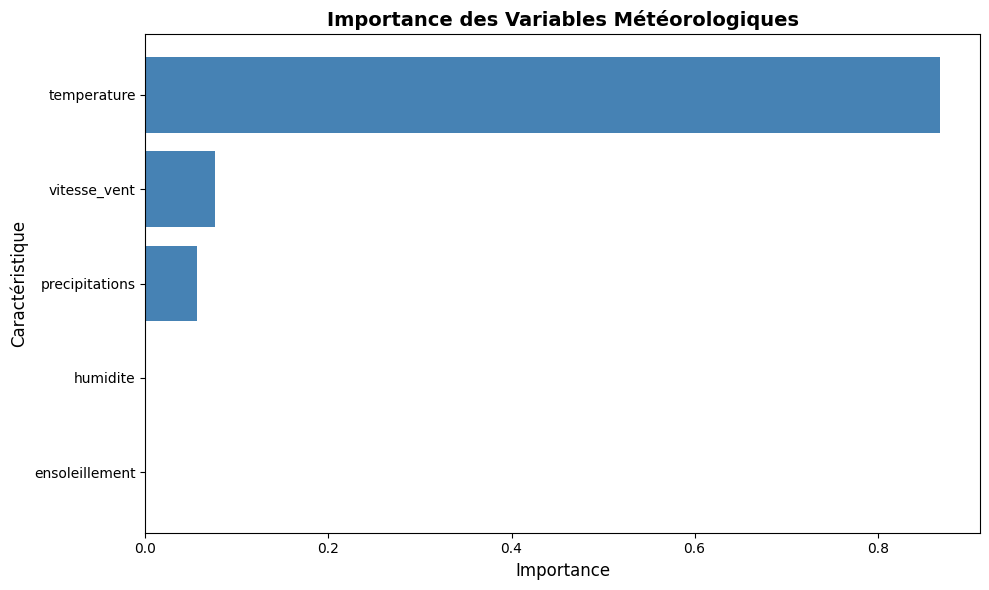

In [118]:
# Importance des caractéristiques
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("IMPORTANCE DES CARACTÉRISTIQUES :")
print("=" * 50)
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:20s} : {row['importance']:.4f} ({row['importance']*100:.2f}%)")

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Caractéristique', fontsize=12)
plt.title("Importance des Variables Météorologiques", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()